# 使用方法：
在 json_extract_v2.py 里面的main方法里选择一个你要生成的csv文件（其他两个注释掉即可），然后在local_conf.yaml里指定你的数据源路径，运行json_extract_v2.py可以生成对应的csv，倒数第三个字段是时间戳，最后两个字段是label

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

%matplotlib inline

df = pd.read_csv('./csv/virtual-20200629.csv')
column = df.columns
df.head()


,/devices#IntGW-01/flavor/ram,/devices#IntGW-01/flavor/vcpus,/devices#IntGW-01/flavor/disk,/devices#IntGW-01/image/min_ram,/devices#IntGW-01/image/min_disk,/devices#IntGW-01/image/size,/devices#IntGW-01/image/metrics/image-size,/devices#IntGW-01/power_state,/devices#IntGW-01/metrics/disk-device-allocation,/devices#IntGW-01/metrics/disk-device-capacity,...,/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,/time,type,type_code
0,8192,4,0,0,0,919863296,919863296.0,1,499712.0,4.997120e+05,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,8192,4,0,0,0,919863296,919863296.0,1,46931968.0,8.589935e+09,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,8192,4,0,0,0,919863296,919863296.0,1,499712.0,4.997120e+05,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1593395700,ixnetwork-traffic-start,0
3,8192,4,0,0,0,919863296,919863296.0,1,499712.0,4.997120e+05,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1593395760,ixnetwork-traffic-start,0
4,8192,4,0,0,0,919863296,919863296.0,1,499712.0,4.997120e+05,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1593395820,ixnetwork-traffic-start,0


In [2]:
# 时间戳转成 小时:分钟 形式
X = (pd.to_datetime(df[column[-3]], unit='s') + timedelta(hours=9)).dt.strftime('%H:%M')
X.head()

0    10:53
1    10:54
2    10:55
3    10:56
4    10:57
Name: /time, dtype: object

In [3]:
# 刻度每5min一个
X_axis = X[::5]
X_axis.head()

0     10:53
5     10:58
10    11:03
15    11:08
20    11:13
Name: /time, dtype: object

In [4]:
def draw_nxm(n, m, start=0):
    for i in range(n):
        plt.figure(figsize=(20, 6))
        for j in range(m):
            index = (i * n) + j + start
            if index > len(column) - 1 :
                break
            y = df[column[index]]
            plt.subplot(n,m,1+index-start)
            plt.plot(X,y)
            plt.title('#'+str(index))
            plt.axis('off')
        plt.show()


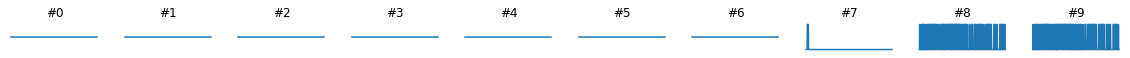

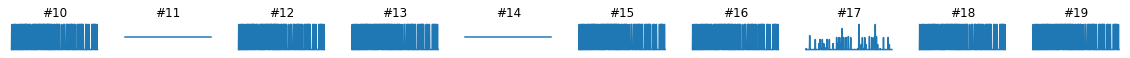

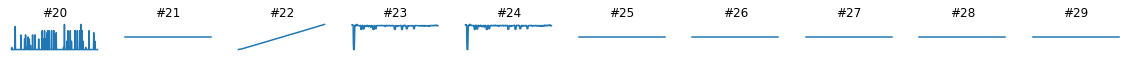

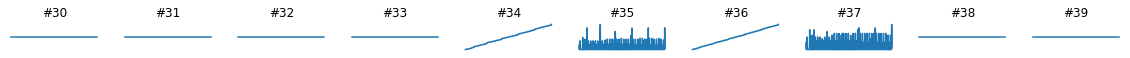

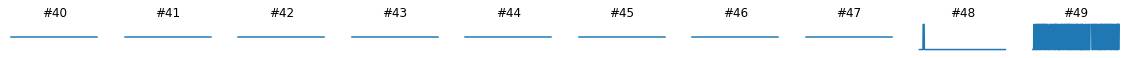

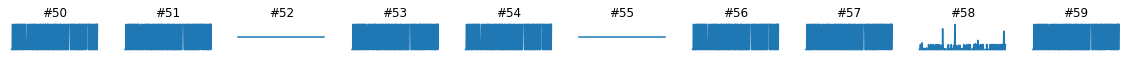

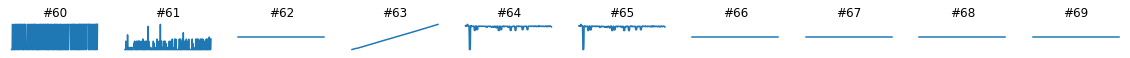

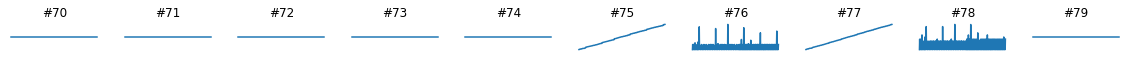

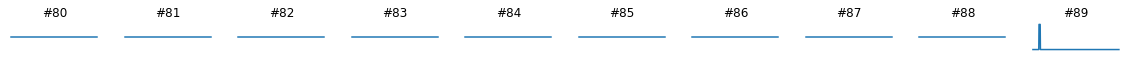

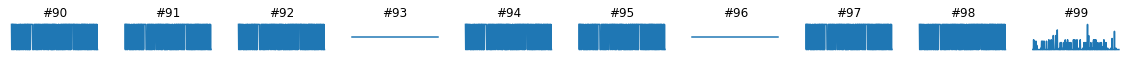

In [5]:
# 注意别画太多，很耗时
draw_nxm(10,10)

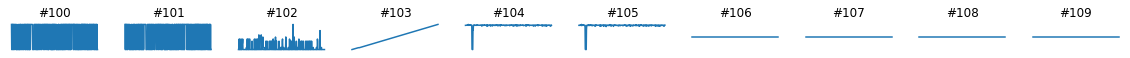

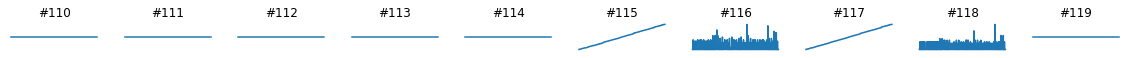

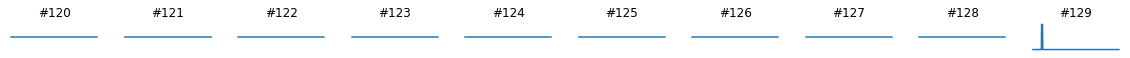

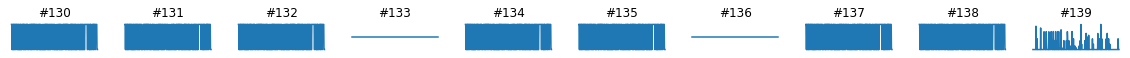

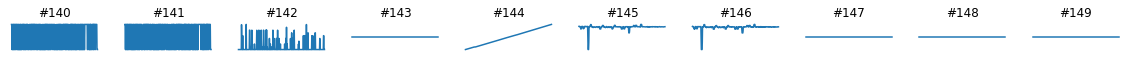

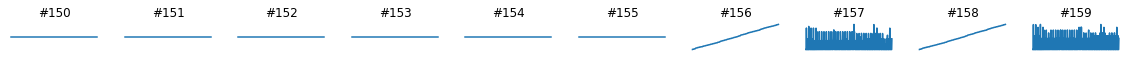

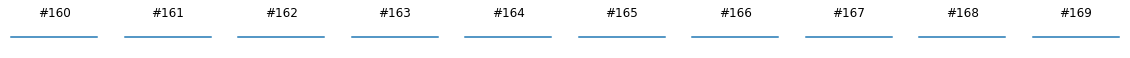

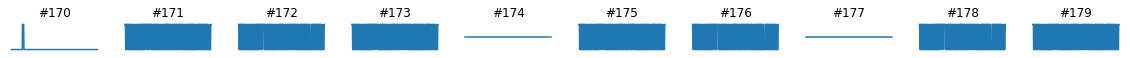

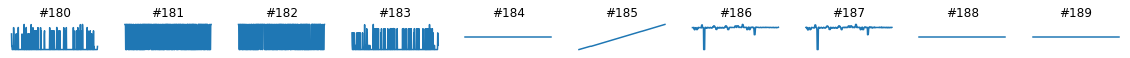

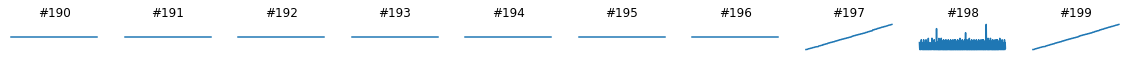

In [6]:
# 从第100个属性开始
draw_nxm(10,10,100)

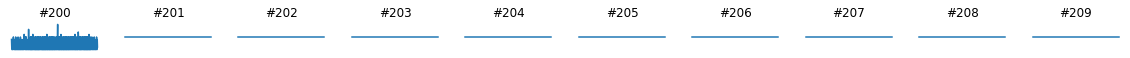

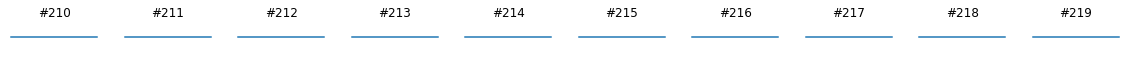

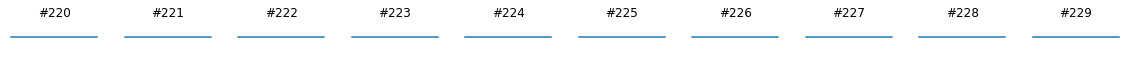

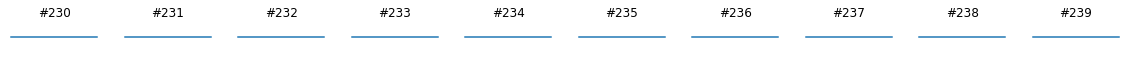

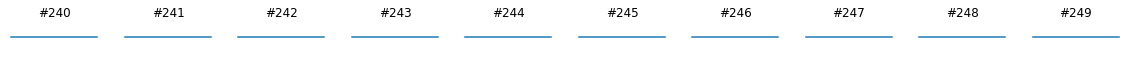

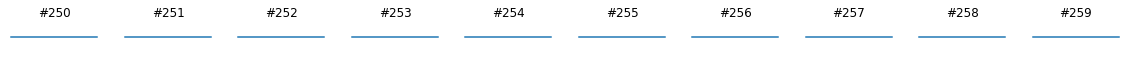

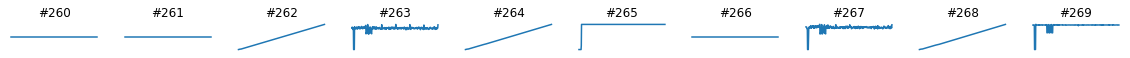

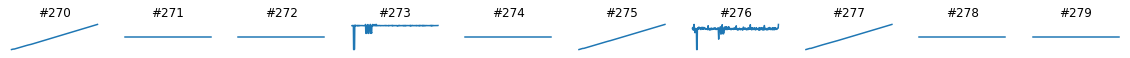

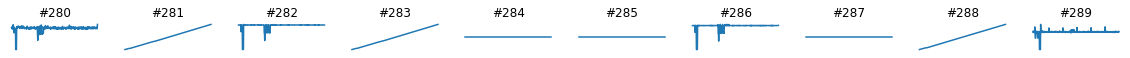

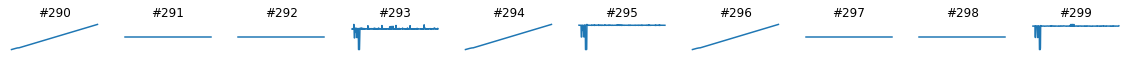

In [7]:
# 从第200个属性开始
draw_nxm(10,10,200)

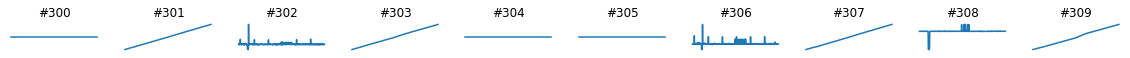

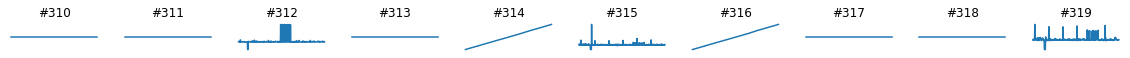

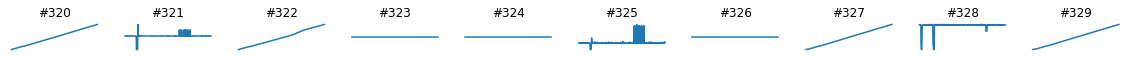

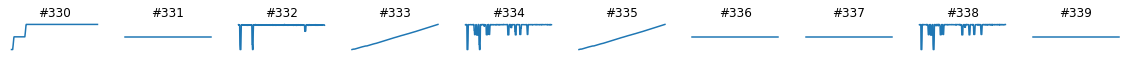

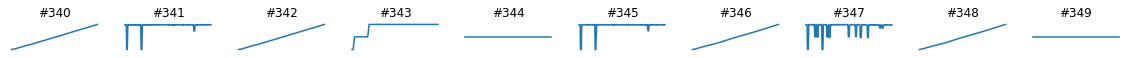

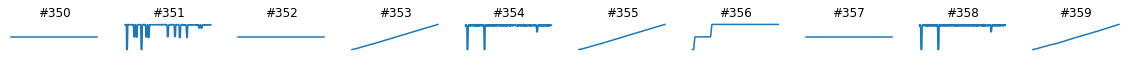

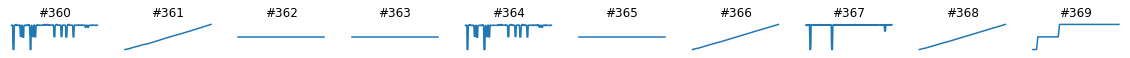

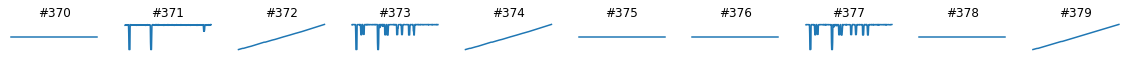

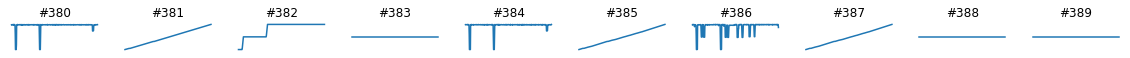

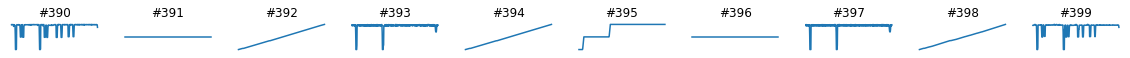

In [8]:
# 从第300个属性开始
draw_nxm(10,10,300)

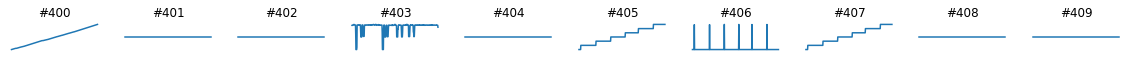

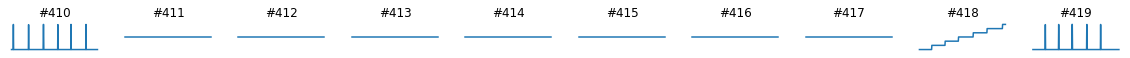

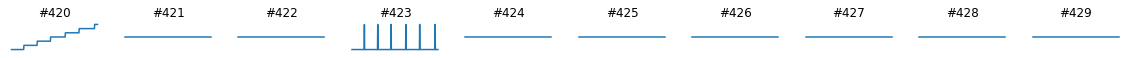

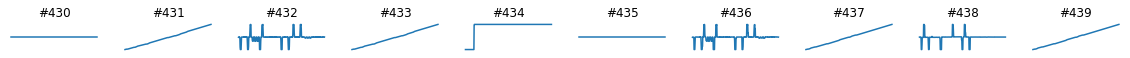

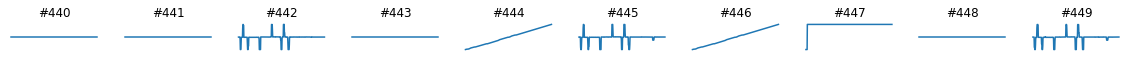

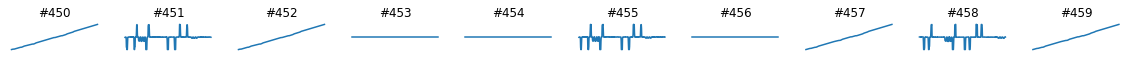

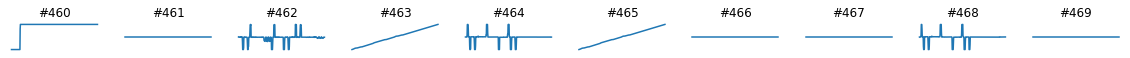

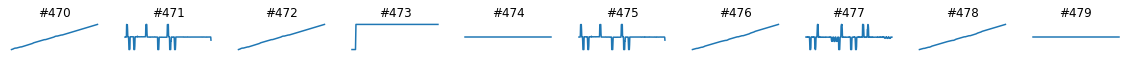

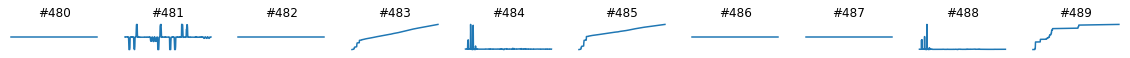

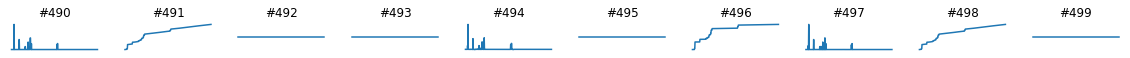

In [9]:
# 从第400个属性开始
draw_nxm(10,10,400)

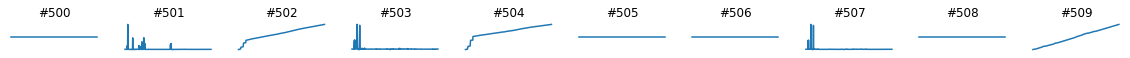

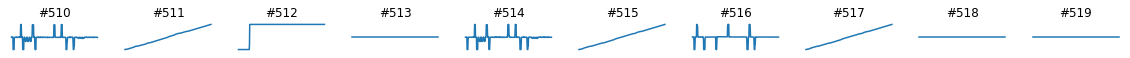

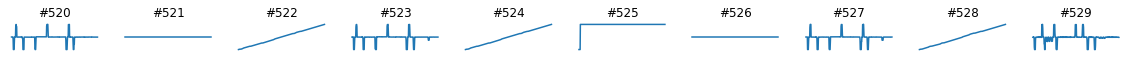

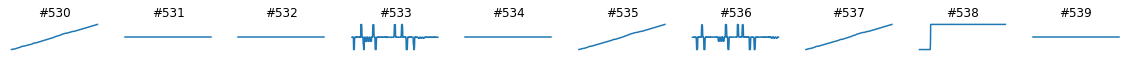

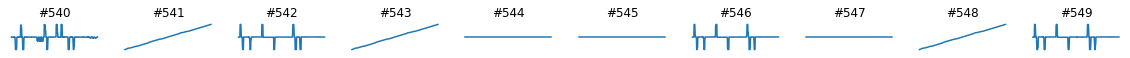

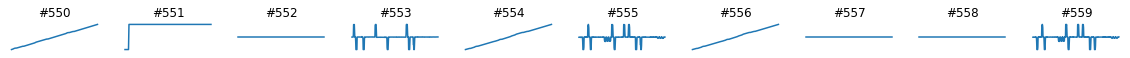

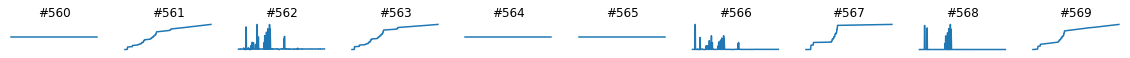

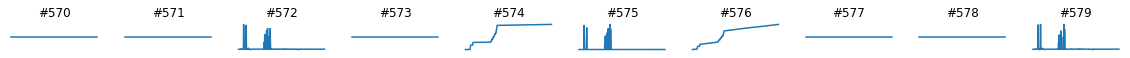

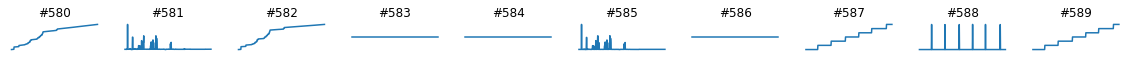

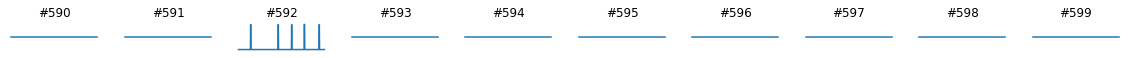

In [10]:
# 从第500个属性开始
draw_nxm(10,10,500)

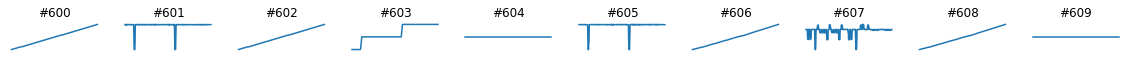

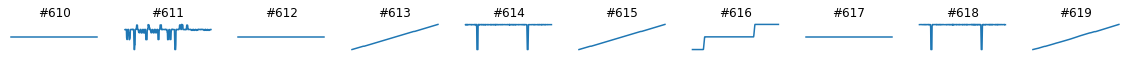

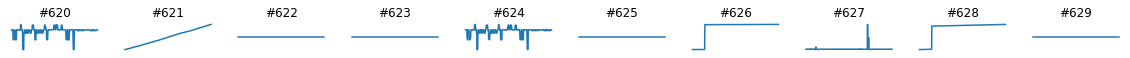

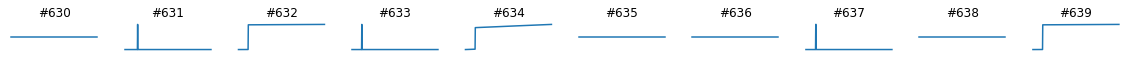

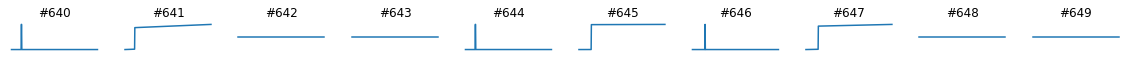

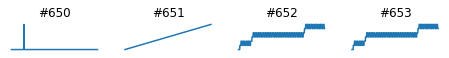

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

In [11]:
# 从第600个属性开始
draw_nxm(10,10,600)

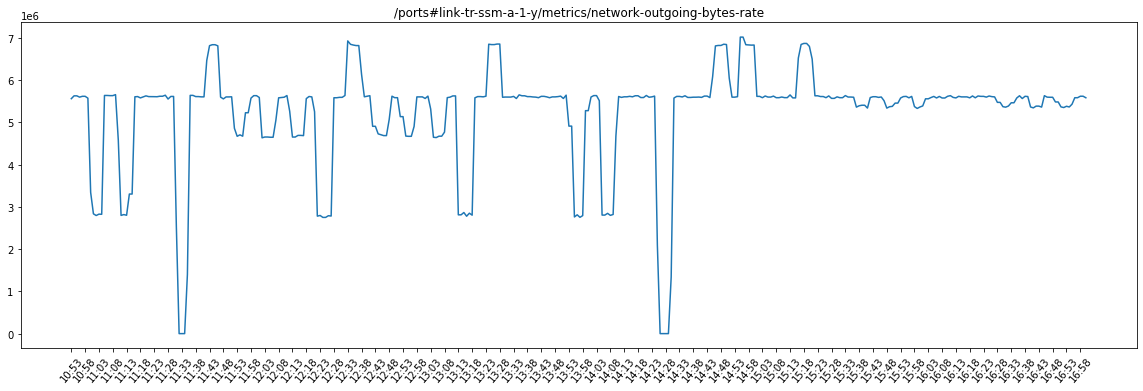

In [12]:
# column[index] 输入你要查看的编号即可
col_name = column[607]
y1 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y1)
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

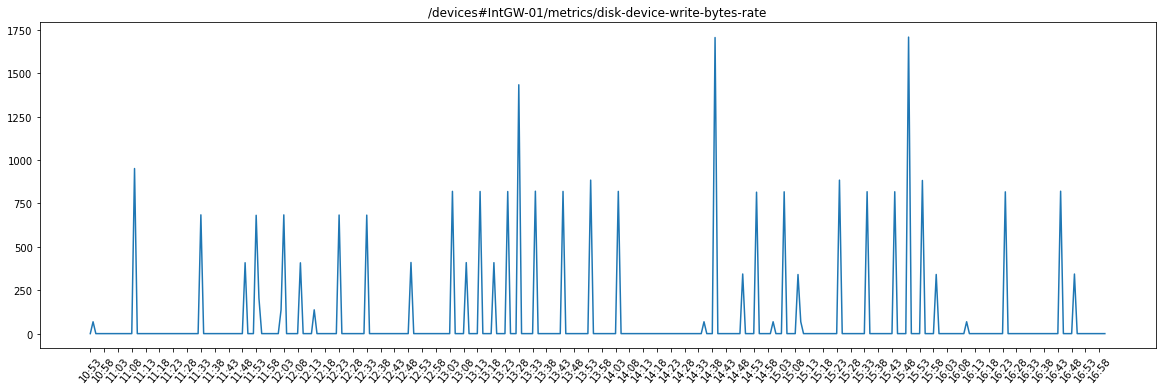

In [13]:
col_name = column[17]
y2 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y2)
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()
